<a href="https://colab.research.google.com/github/TechGovinda/ml-Project/blob/main/KM064_adult_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv('/content/adult.csv', header=None, na_values=' ?')

In [ ]:
dataset.shape

(32561, 15)

In [ ]:
dataset.isnull().sum()

0        0
1     1836
2        0
3        0
4        0
5        0
6     1843
7        0
8        0
9        0
10       0
11       0
12       0
13     583
14       0
dtype: int64

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
dataset.columns=['age', 'workclass', 'wgt', 'edu', 'edu_num', 'marital_status',
                 'occ', 'relation', 'race', 'sex', 'gain','loss','hpw',
                 'country', 'income']

In [ ]:
dataset.head()

,age,workclass,wgt,edu,edu_num,marital_status,occ,relation,race,sex,gain,loss,hpw,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
dataset1=si.fit_transform(dataset)
dataset1=pd.DataFrame(dataset1)
print(dataset1.isna().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64


In [ ]:
dataset1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
cols=[1,3,5,6,7,8,9,13,14]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
  dataset1[i]=le.fit_transform(dataset1[i])
print(dataset1.head())

   0   1       2   3   4   5   6   7   8   9     10 11  12  13  14
0  39   6   77516   9  13   4   0   1   4   1  2174  0  40  38   0
1  50   5   83311   9  13   2   3   0   4   1     0  0  13  38   0
2  38   3  215646  11   9   0   5   1   4   1     0  0  40  38   0
3  53   3  234721   1   7   2   5   0   2   1     0  0  40  38   0
4  28   3  338409   9  13   2   9   5   2   0     0  0  40   4   0


In [ ]:
target=dataset1[14]
input=dataset1.drop(columns=[14])
print(target.shape)
print(input.shape)

(32561,)
(32561, 14)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(input, target, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(22792, 14)
(9769, 14)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV

In [ ]:
'''param=[ {'alpha':[0.001, 0.01, 0.1, 1]},
       {'eta0':[0.01,0.03,0.05,0.1]},
       {'penalty':['l1', 'l2', 'elasticnet']}]
gs=GridSearchCV(estimator=Perceptron(), param_grid=param)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)'''

p=Perceptron()
p.fit(x_train, y_train)
train_results=p.predict(x_train)
test_results=p.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Training Accuracy: ", accuracy_score(y_train, train_results))
print("Testing Accuracy: ", accuracy_score(y_test, test_results))

Training Accuracy:  0.7680765180765181
Testing Accuracy:  0.7603644180571194


In [ ]:
y_train.unique()

array([0, 1])

In [ ]:
y_train.shape

(22792,)

In [ ]:
(y_train==0).sum()

17335

In [ ]:
(y_train==1).sum()

5457

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train, train_results)

array([[15986,  1349],
       [ 3937,  1520]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print(precision_score(y_train, train_results))

0.5298013245033113


In [ ]:
print(recall_score(y_train, train_results))

0.2785413230712846


In [ ]:
print(f1_score(y_train, train_results))

0.36512130674994


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lr_train_pred=lr.predict(x_train)
lr_test_pred=lr.predict(x_test)

In [ ]:
print("Training Accuracy:", accuracy_score(y_train, lr_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, lr_test_pred))

Training Accuracy: 0.8253773253773253
Testing Accuracy: 0.8222950148428703


In [ ]:
confusion_matrix(y_train, lr_train_pred)

array([[16351,   984],
       [ 2996,  2461]])

In [ ]:
lr.predict(x_train[[17200]])

array([0])

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)

SVC()

In [ ]:
svc_train_pred=svc.predict(x_train)
svc_test_pred=svc.predict(x_test)
print("Training Accuracy:", accuracy_score(svc_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(svc_test_pred, y_test))

Training Accuracy: 0.8566602316602316
Testing Accuracy: 0.846043607329307


In [ ]:
print("confusion_matrix:")
confusion_matrix(svc_train_pred, y_train)

confusion_matrix:


array([[16427,  2359],
       [  908,  3098]])

In [ ]:
params_svc=[{'C':[0.001,0.01,0.1,1,10,100]}, {'kernel':['linear', 'poly','rbf']}]

In [ ]:
gs_svc=GridSearchCV(estimator=SVC(), param_grid=params_svc)

In [ ]:
gs_svc.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_train_results=knn.predict(x_train)
knn_test_results=knn.predict(x_test)
print("Training Accuracy:", accuracy_score(knn_train_results, y_train))
print("Testing Accuracy:", accuracy_score(knn_test_results, y_test))

Training Accuracy: 0.8765795015795016
Testing Accuracy: 0.8275156106049749


In [ ]:
params_knn=[{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}]

In [ ]:
gs_knn=GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_knn)

In [ ]:
gs_knn.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
gs_knn.best_score_

In [ ]:
gs_knn.best_params_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini', max_depth=5)

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
dt_train_results=dt.predict(x_train)
dt_test_results=dt.predict(x_test)

In [ ]:
print("Training Accuracy:", accuracy_score(dt_train_results, y_train))
print("Testing Accuracy:", accuracy_score(dt_test_results, y_test))

Training Accuracy: 0.8555194805194806
Testing Accuracy: 0.8468625243115979


[Text(0.5625, 0.9166666666666666, 'x[7] <= -0.591\nentropy = 0.794\nsamples = 22792\nvalue = [17335, 5457]'),
 Text(0.2840909090909091, 0.75, 'x[4] <= 0.937\nentropy = 0.993\nsamples = 9216\nvalue = [5077, 4139]'),
 Text(0.14772727272727273, 0.5833333333333334, 'x[10] <= 0.541\nentropy = 0.915\nsamples = 6426\nvalue = [4302, 2124]'),
 Text(0.09090909090909091, 0.4166666666666667, 'x[4] <= -0.612\nentropy = 0.876\nsamples = 6099\nvalue = [4297, 1802]'),
 Text(0.045454545454545456, 0.25, 'x[12] <= 0.251\nentropy = 0.508\nsamples = 1020\nvalue = [905, 115]'),
 Text(0.022727272727272728, 0.08333333333333333, 'entropy = 0.423\nsamples = 779\nvalue = [712, 67]'),
 Text(0.06818181818181818, 0.08333333333333333, 'entropy = 0.72\nsamples = 241\nvalue = [193, 48]'),
 Text(0.13636363636363635, 0.25, 'x[11] <= 4.143\nentropy = 0.917\nsamples = 5079\nvalue = [3392, 1687]'),
 Text(0.11363636363636363, 0.08333333333333333, 'entropy = 0.896\nsamples = 4858\nvalue = [3340, 1518]'),
 Text(0.159090909090

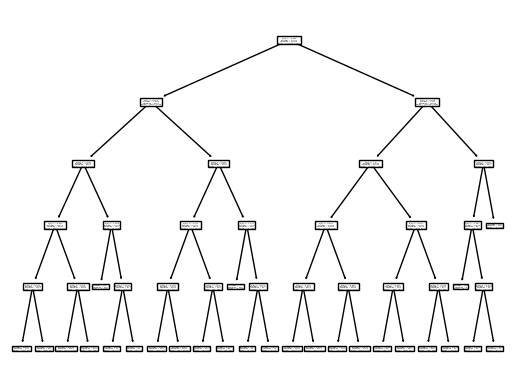

In [ ]:
from sklearn import tree
tree.plot_tree(dt)

In [ ]:
dt.n_features_in_

14

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
nb_train_results=nb.predict(x_train)
nb_test_results=nb.predict(x_test)

In [ ]:
print("Training Accuracy:", accuracy_score(nb_train_results, y_train))
print("Testing Accuracy:", accuracy_score(nb_test_results, y_test))

Training Accuracy: 0.808968058968059
Testing Accuracy: 0.8011055379260927
